In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_table('data/processed_events.txt', sep=' ')
print(data.head())

                             summary  day_number  weekday  minutes_of_day  \
0    zapis stipendium diplomy na gjh         274        3             450   
1                   skolske kolo acm         289        4             660   
2          prve 2 kapitoly z algebry         272        1             480   
3                         rychlostne         272        1             990   
4  spisat si otazky na ksp chatu d u         273        2             780   

   duration_minutes     label  
0             120.0  personal  
1             320.0  personal  
2              90.0  personal  
3             180.0  personal  
4              60.0  personal  


# Select categories
Count most frequent words (top ~150), categorize them into hand-crafted categories.

In [3]:
summaries = data['summary'][data['label'] == 'personal']

word_frequencies = utils.count_word_frequencies(summaries)
print(word_frequencies[0:200])

# print('----------------------------------------------')
# ngram_frequencies = utils.count_ngram_frequencies(summaries, 5)
# print(ngram_frequencies[:100])

[('a', 387), ('s', 318), ('ksp', 296), ('gitara', 249), ('obed', 243), ('9gag', 228), ('o', 226), ('film', 194), ('vecera', 186), ('na', 168), ('cvicenie', 139), ('ranajky', 137), ('sprcha', 128), ('v', 126), ('maily', 101), ('proofread', 92), ('u', 92), ('riad', 91), ('prask', 82), ('stretko', 76), ('the', 73), ('so', 70), ('mail', 69), ('do', 62), ('d', 61), ('foja', 60), ('upratovanie', 59), ('priprava', 52), ('z', 52), ('ted', 50), ('youtube', 47), ('matalyza', 47), ('vacuumlabs', 42), ('videa', 40), ('2', 39), ('wow', 39), ('1', 38), ('google', 37), ('tmf', 37), ('web', 35), ('cesta', 35), ('got', 34), ('ufo', 33), ('fb', 33), ('t2', 33), ('kniha', 31), ('of', 30), ('7', 30), ('trojsten', 29), ('pre', 29), ('fotky', 28), ('syslom', 28), ('prehlad', 27), ('6', 26), ('aj', 25), ('snaha', 24), ('balenie', 23), ('yousician', 23), ('5', 23), ('java', 23), ('sa', 23), ('vstupov', 22), ('kubom', 22), ('diskusia', 22), ('rodicmi', 21), ('ls', 21), ('citanie', 20), ('ulohy', 20), ('sustred

In [38]:
categories_from_words = {
    'trojsten': ['ksp', 'proofread', 'stretko', 'prask', 'submit', 't2', 'ufo', 'trojsten', 'vstupov', 
                 'ls', 'sustredkove', 'ttt', 'opravovanie', 'ltt', 'vzorak', 'trojstenu', 'vzorakov', 'zadani',
                 'zadanie', 'vzoraky', 'zadania', 'vyberko', 'naboj', 'naboja', 'vstupy', 'fks', 'vzoraku',
                 'doodle', 'novinka', 'riesenia', ],
    # 'chores': ['riad', 'upratovanie', 'vysavanie', 'umyvanie', 'ponozky'], # too few: 100
    'school': ['foja', 'rp', 'bak', 'matalyza', 'uvod', 'kombat','mbi', 'pisomka', 'alg', 
               'xp', 'java', 'tg', 'algebra', 'pts', 'analyza', 'siete', 'pp', 'uktg', 'opakovanie', 'limity',
               'acm', 'ads', 'udds', 'sait', 'rychlostne', 'cup', ], # too few: 100
    # 'work': ['vacuumlabs', 'tmf', ],
    
    'active_relax': ['gitara', 'wow', 'yousician', 'spev', 'stronghold', 'spevnik', 'epica',
                     'frisbee', 'prechadzka', 'posilovanie',],
    # 'workout': ['rozcvicka', 'cvicenie', 'rehabilitacia', 'frisbee', 'prechadzka', 'posilovanie', ], 
    # too few events, conflicts with food (ranajky, rozcvicka, sprcha)
    
    'passive_relax': ['9gag', 'film', 'ted', 'youtube', 'kniha', 'fb', 'got', 'citanie', 'wbw', 'hudba', 'filmov',
                     'facebook', 'vsauce', 'gtd', 'collegehumor', 'watchmojo', 'internet', 'zvyku', 'gordulic',
                     'filmu', 'consciousness', 'bourkova', 'filmy', 'pozeranie', ],
    
    'food': ['obed', 'vecera', 'ranajky', 'pizza'],
    # 'washing': ['sprcha', 'vana', ],
    # 'transport': ['cesta', ],
    # 'with_people': ['kubom', 'syslom', 'zabom', 'petou', 'rodicmi', 'chat', 'fifcom', 'oslava', 'bujom', 'janom', 
    #                 'sandynou', 'dedkom', 'baklazanom', 'petom', 'misom', 'rozpravanie', 'kapustnica', 'pivo',
    #                 'tatom', 'andrejky', ],
}   

key_words = [word for cat, words in categories_from_words.items() for word in words]
print(key_words)

['ksp', 'proofread', 'stretko', 'prask', 'submit', 't2', 'ufo', 'trojsten', 'vstupov', 'ls', 'sustredkove', 'ttt', 'opravovanie', 'ltt', 'vzorak', 'trojstenu', 'vzorakov', 'zadani', 'zadanie', 'vzoraky', 'zadania', 'vyberko', 'naboj', 'naboja', 'vstupy', 'fks', 'vzoraku', 'doodle', 'novinka', 'riesenia', '9gag', 'film', 'ted', 'youtube', 'kniha', 'fb', 'got', 'citanie', 'wbw', 'hudba', 'filmov', 'facebook', 'vsauce', 'gtd', 'collegehumor', 'watchmojo', 'internet', 'zvyku', 'gordulic', 'filmu', 'consciousness', 'bourkova', 'filmy', 'pozeranie', 'obed', 'vecera', 'ranajky', 'pizza', 'gitara', 'wow', 'yousician', 'spev', 'stronghold', 'spevnik', 'epica', 'frisbee', 'prechadzka', 'posilovanie', 'foja', 'rp', 'bak', 'matalyza', 'uvod', 'kombat', 'mbi', 'pisomka', 'alg', 'xp', 'java', 'tg', 'algebra', 'pts', 'analyza', 'siete', 'pp', 'uktg', 'opakovanie', 'limity', 'acm', 'ads', 'udds', 'sait', 'rychlostne', 'cup']


# Categorize summaries
Attach categories to each summary based on key words.

Some categories were discarded (commented out in `categories_from_words` dictionary) due to not enough events in them or because of conflicts (e.g. `with_people` category had a large overlap with `food`).

Finally if a summary have fallen into multiple categories, it was marked as uncategorized.

In [79]:
def categorize_summaries(summaries, categories_from_words):
    """
    For each summary creates a list of categories (list of strings).
    """
    categorization = []
    word_to_category_dict = {word: cat for cat, words in categories_from_words.items() for word in words}
    
    for summary in summaries:
        categories = []
        for word in summary.split():
            cat = word_to_category_dict.get(word)
            if cat is not None and cat not in categories:
                categories.append(cat)
        categorization.append(categories)
    
    return categorization

categorization = categorize_summaries(summaries, categories_from_words)

categorized = sum([1 for cats in categorization if len(cats) > 0])
print('Uncategorized:', len(summaries) - categorized)
print('Categorized:', categorized)
print('At least 2 cats:', sum([1 for cats in categorization if len(cats) > 1]))
print('At least 3 cats:', sum([1 for cats in categorization if len(cats) > 2]))


n_categories = len(categories_from_words.keys())
category_to_int = {cat: i for i, cat in enumerate(categories_from_words.keys())}

cor_mat = np.zeros([n_categories, n_categories])
for summary, categories in zip(summaries, categorization):
    if len(categories) > 1:
        ca = category_to_int[categories[0]]
        cb = category_to_int[categories[1]]
        cor_mat[ca, cb] += 1
        
        cor_mat[cb, ca] += 1
        
        # print(summary, categories)
        
print(category_to_int)
print(cor_mat)

Uncategorized: 1675
Categorized: 2497
At least 2 cats: 157
At least 3 cats: 1
{'trojsten': 0, 'passive_relax': 1, 'food': 2, 'active_relax': 3, 'school': 4}
[[  0.  14.  10.  15.   5.]
 [ 14.   0.  79.  10.  11.]
 [ 10.  79.   0.  12.   1.]
 [ 15.  10.  12.   0.   0.]
 [  5.  11.   1.   0.   0.]]


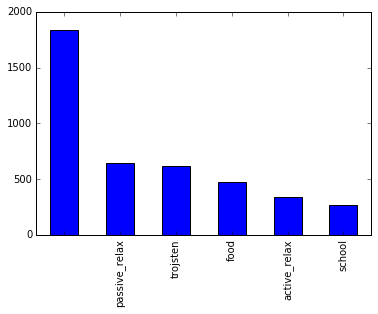

In [59]:
unambiguous = pd.Series([categories[0] if len(categories) == 1 else "" for categories in categorization])
unambiguous.value_counts().plot(kind='bar')
plt.show()

In [77]:
data = data.rename(index=str, columns={'label': 'calendar'})

data['category'] = data['calendar']
data.loc[data['calendar'] == 'personal', 'category'] = unambiguous.tolist()
print(data)

                                summary  day_number  weekday  minutes_of_day  \
0       zapis stipendium diplomy na gjh         274        3             450   
1                      skolske kolo acm         289        4             660   
2             prve 2 kapitoly z algebry         272        1             480   
3                            rychlostne         272        1             990   
4     spisat si otazky na ksp chatu d u         273        2             780   
5                               ads d u         274        3            1020   
6                    algebra inverznost         275        4             360   
7                        gjh ocenovanie         281        3             660   
8             trojstenovy pondeok kvizy         278        0             720   
9      aj du slovicka gumovanie algebra         279        1             480   
10                        d u programko         279        1            1050   
11                        web trojstenu 

In [78]:
data.to_csv('categorized_events.csv')